In [258]:
import os
import pandas as pd
import numpy as numpy
from datetime import datetime, timedelta
import yfinance as yf

import matplotlib.pyplot as plt
import plotly.express as px
import pytz  # Make sure to import pytz for timezone handling
import seaborn as sns

In [259]:
sp500_etf_dict = {
    'Consumer_Discretionary': 'XLY'
    ,'Consumer_Staples': 'XLP'
    ,'Energy': 'XLE'
    ,'Financial': 'XLF'
    ,'Health Care': 'XLV'
    ,'Industrial': 'XLI'
    ,'Material': 'XLB'
    ,'Technology': 'XLK'
    ,'Utilities': 'XLU'
    ,'SP_500': 'SPY'
}

In [260]:

# Periods to fetch the data for
periods = [
    'now'
    ,'30d'
    ,'60d'
    ,'90d' 
    ,'1y'
    ,'3y'
    ,'5y'
    ,'10y'
    ,'15y'
    ,'20y'
    ,'25y'
    ,'30y'
           ]

# Calculate the start date for the earliest period (20 years ago), making it timezone-aware
start_date = (datetime.now(pytz.UTC) - timedelta(days=365*30)).strftime('%Y-%m-%d')

# DataFrame to store the results
df_closing_prices = pd.DataFrame(index=sp500_etf_dict.keys(), columns=periods)

# Function to get the closing price for specific periods
def get_historical_closing_prices(ticker, start_date):
    etf = yf.Ticker(ticker)
    hist = etf.history(start=start_date)
    return hist['Close']


def find_nearest_date(target_date, dates_list):
    """
    Finds and returns the date from dates_list that is closest to target_date.

    Parameters:
    - target_date: The target datetime object you're trying to find the closest match for.
    - dates_list: A list of datetime objects to search within.

    Returns:
    - closest_date: The date from dates_list that is closest to the target_date.
    """


    date_diff_dict = dict(
                        zip(
                            [abs(target_date - i).days for i in dates_list]
                            ,dates_list
                            )
                        )
    
    # Retrieve the value corresponding to the smallest key
    neaerest_date = date_diff_dict[min(date_diff_dict.keys())].strftime('%Y-%m-%d')

    return neaerest_date


# Fetch and process the data for each ETF
for sector, ticker in sp500_etf_dict.items():
    closing_prices = get_historical_closing_prices(ticker, start_date)
    for period in periods:
        if period == 'now':
            # Get the most recent closing price
            period_date = closing_prices.index[-1]
        if period.endswith('d'):
            days = int(period[:-1])
            period_date = datetime.now(pytz.UTC) - timedelta(days=days)
        elif period.endswith('y'):
            years = int(period[:-1])
            period_date = datetime.now(pytz.UTC) - timedelta(days=365*years)
        # Find the closest date index to our target period_date
        period_date_str = period_date.strftime('%Y-%m-%d')
        if period_date_str in closing_prices.index.strftime('%Y-%m-%d'):
            closest_date = period_date_str
        else:
            closest_date = find_nearest_date(period_date, closing_prices.index)
        # Store the corresponding closing price
        df_closing_prices.at[sector, period] = round(closing_prices.loc[closest_date], 4)
        df_closing_prices['ticker'] = sp500_etf_dict.values()

# Display the DataFrame
df_closing_prices


,now,30d,60d,90d,1y,3y,5y,10y,15y,20y,25y,30y,ticker
Consumer_Discretionary,183.26,176.9446,173.7415,180.417,144.3073,163.3223,106.5724,57.7834,16.144,24.3314,21.7436,19.0753,XLY
Consumer_Staples,75.97,73.5088,71.176,70.1634,70.6424,61.6728,48.1988,32.5409,14.2261,13.5547,15.1993,14.7464,XLP
Energy,92.05,84.1103,79.8249,84.0508,77.7237,43.0088,50.816,58.5623,28.1604,16.1965,13.4207,12.2309,XLE
Financial,41.56,39.3718,37.9671,37.1202,31.4014,31.7871,22.8905,14.9966,5.5952,15.6015,12.6415,11.5124,XLF
Health Care,145.45,144.6078,139.566,133.8666,125.6683,110.3781,83.1133,48.927,18.6254,20.9699,19.5981,17.3651,XLV
Industrial,124.41,117.2975,112.9709,112.2431,97.0556,91.608,66.9447,42.6611,13.8013,17.5637,16.1494,14.844,XLI
Material,91.56,84.6858,82.1748,84.7655,76.1031,73.114,48.983,38.3732,16.137,16.4953,12.6593,11.8857,XLB
Technology,209.69,200.1794,200.7186,191.4838,143.5256,128.5449,69.7412,31.7494,12.6419,15.3107,27.9766,24.1499,XLK
Utilities,63.87,60.6886,60.1729,61.8986,63.4753,56.1375,49.852,29.1889,15.0993,11.8741,11.3428,12.3632,XLU
SP_500,520.48,495.2213,481.9526,471.2359,393.2158,375.5961,257.6803,154.9656,60.8091,75.739,83.7051,26.7307,SPY


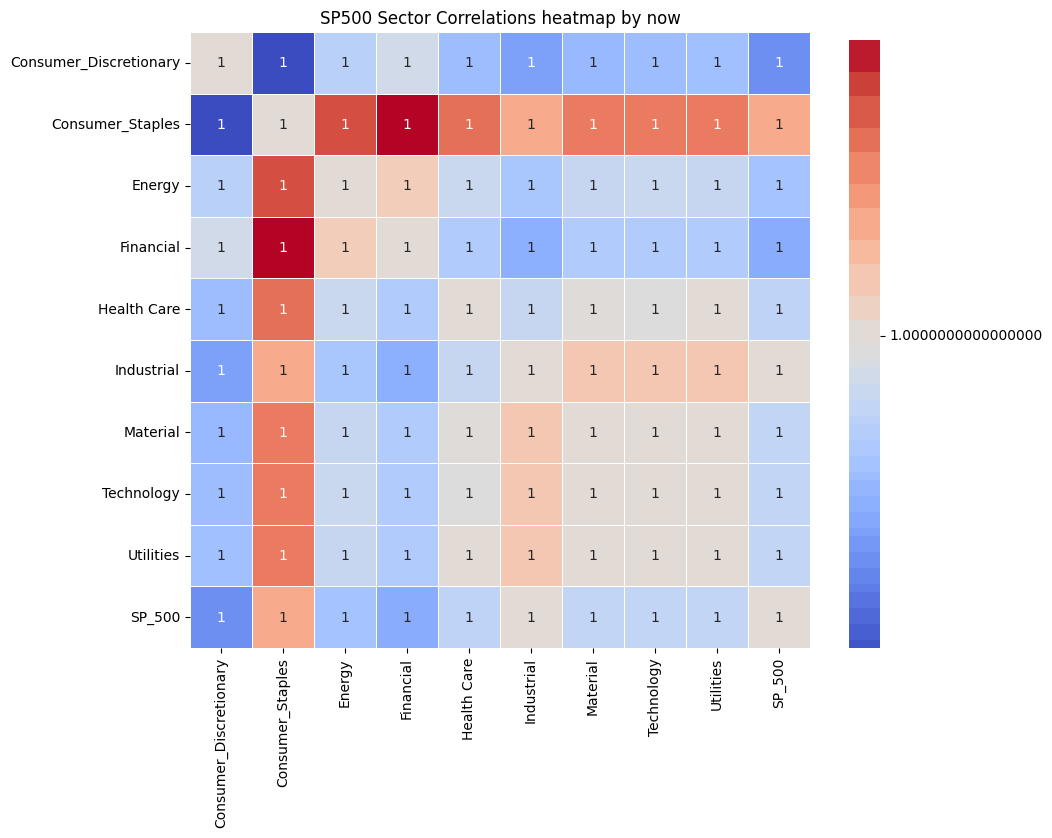

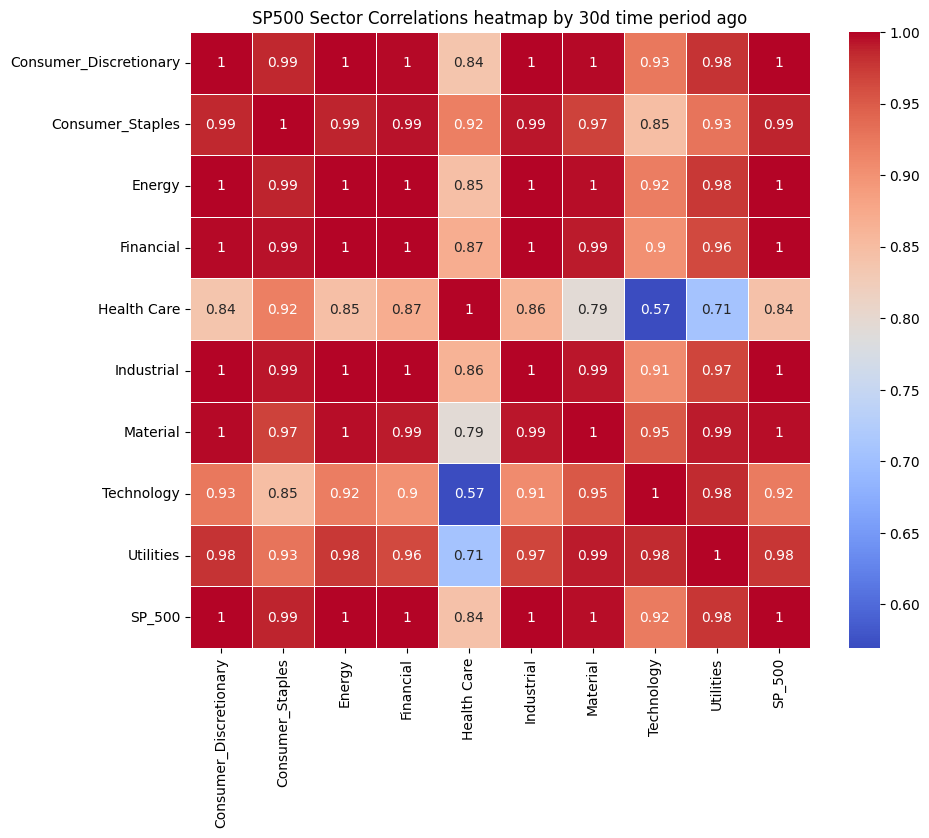

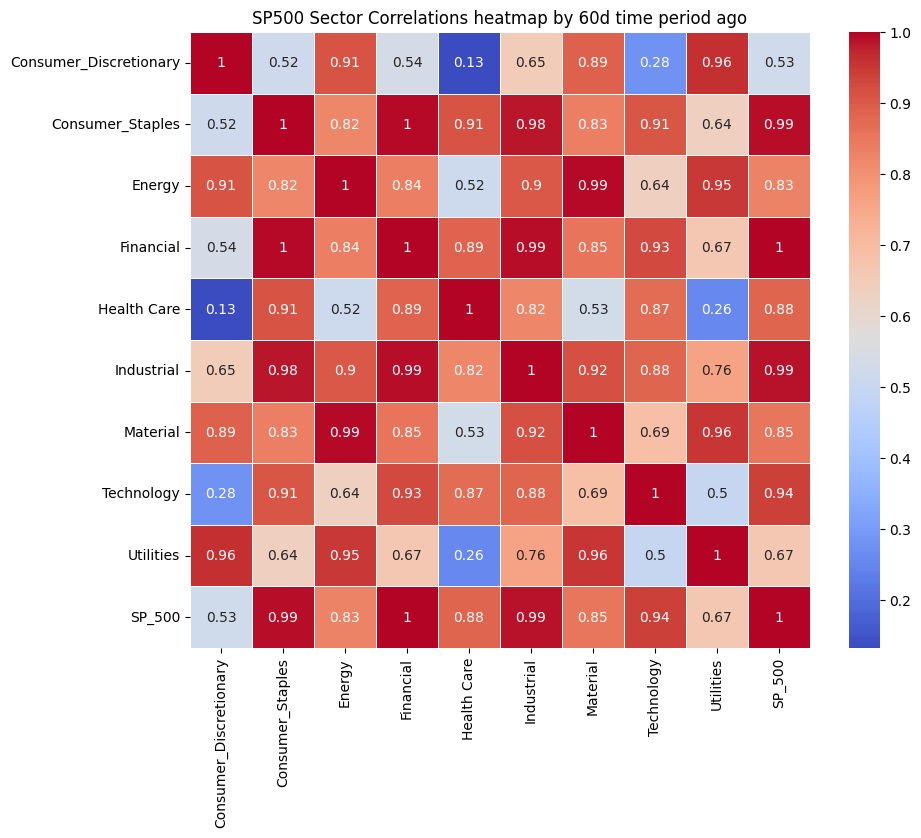

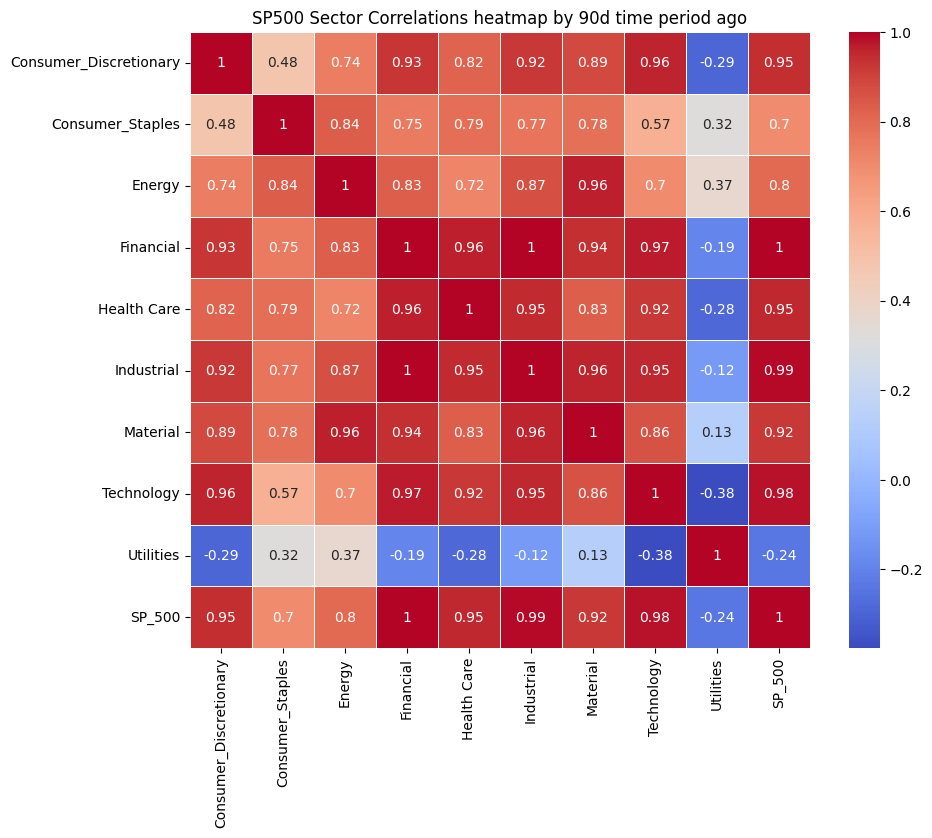

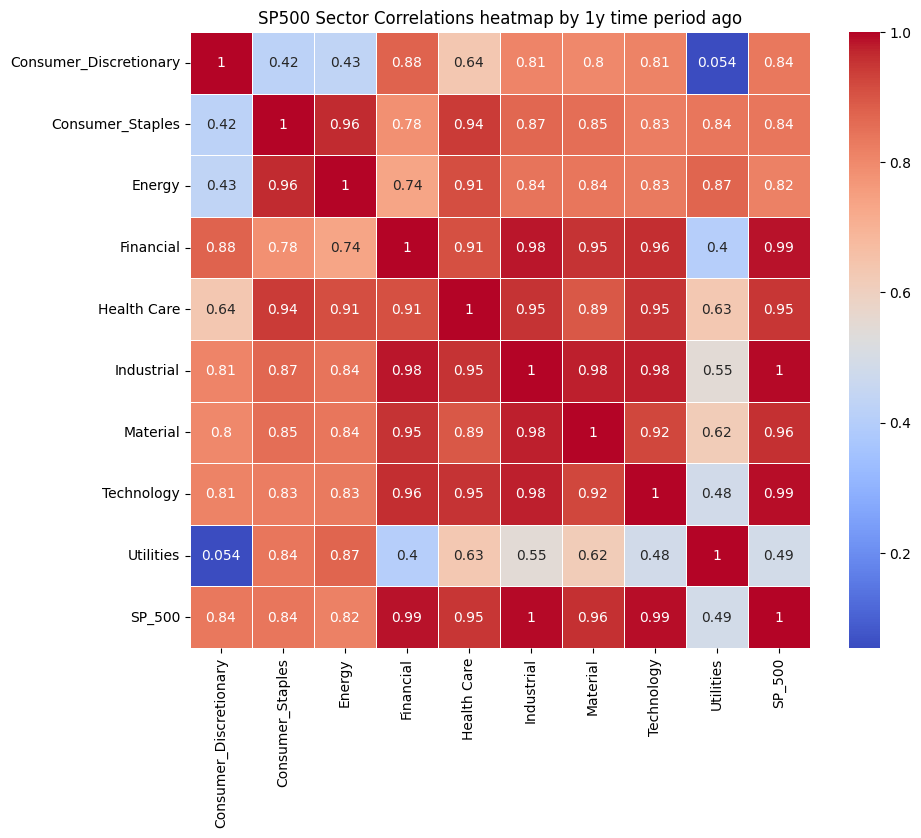

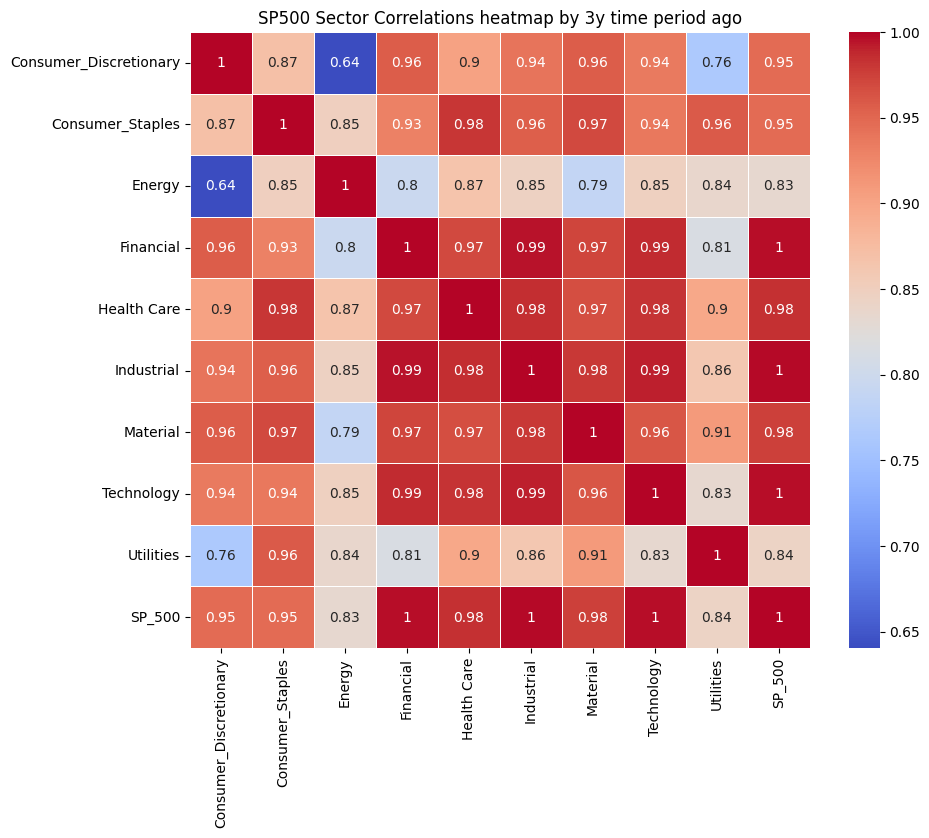

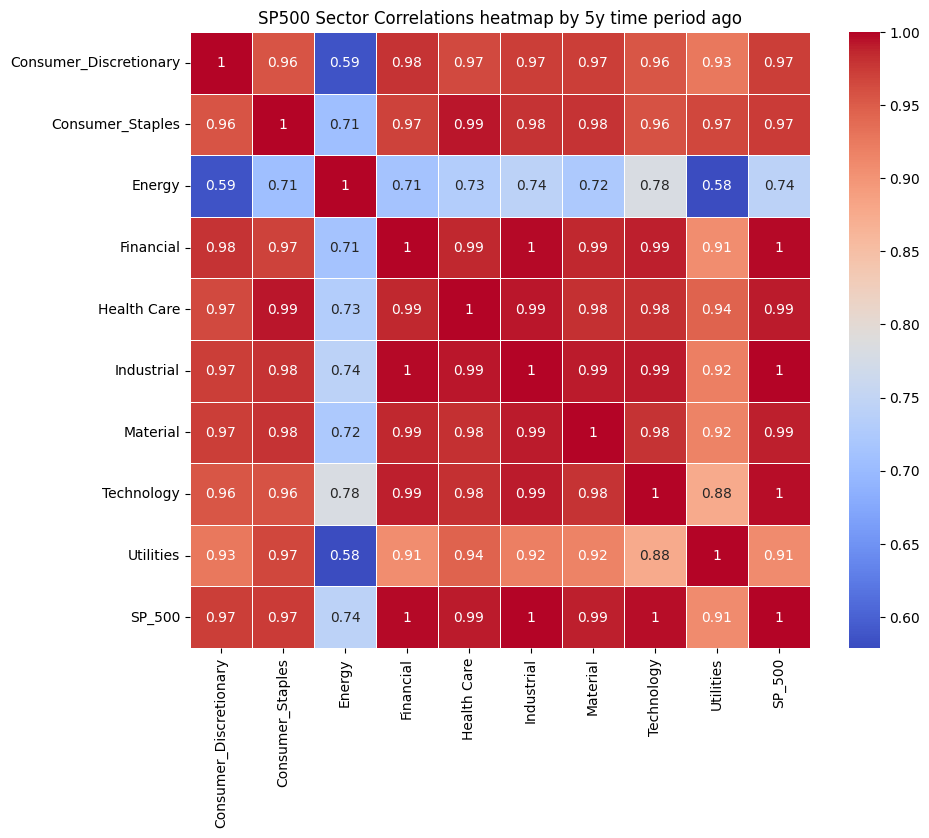

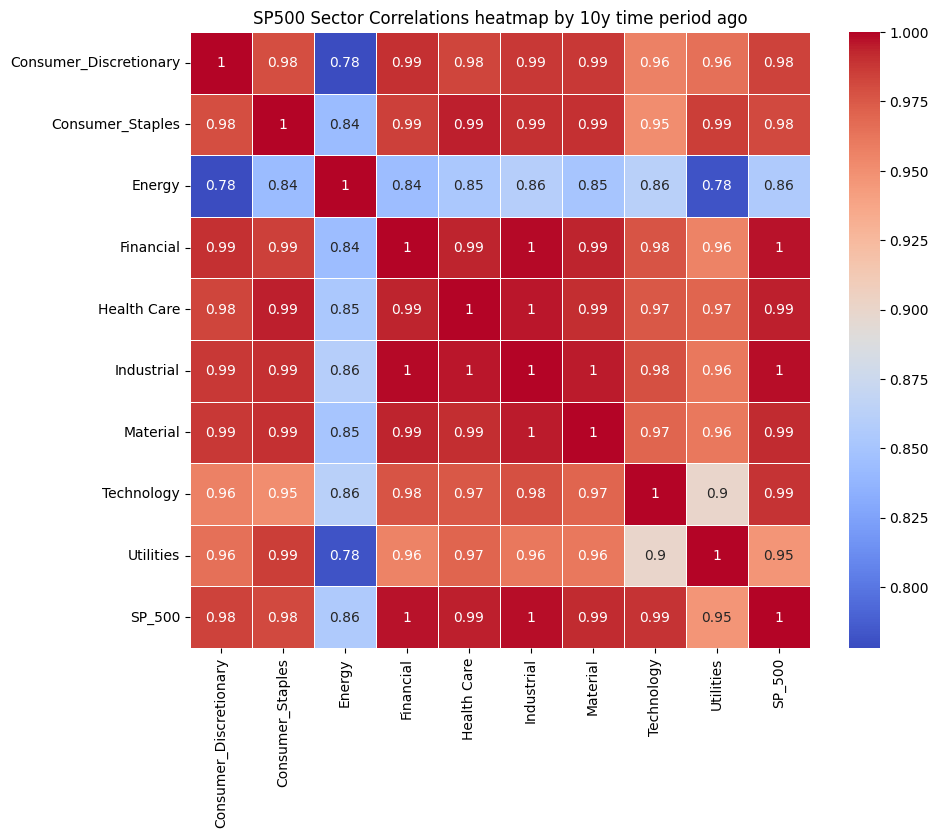

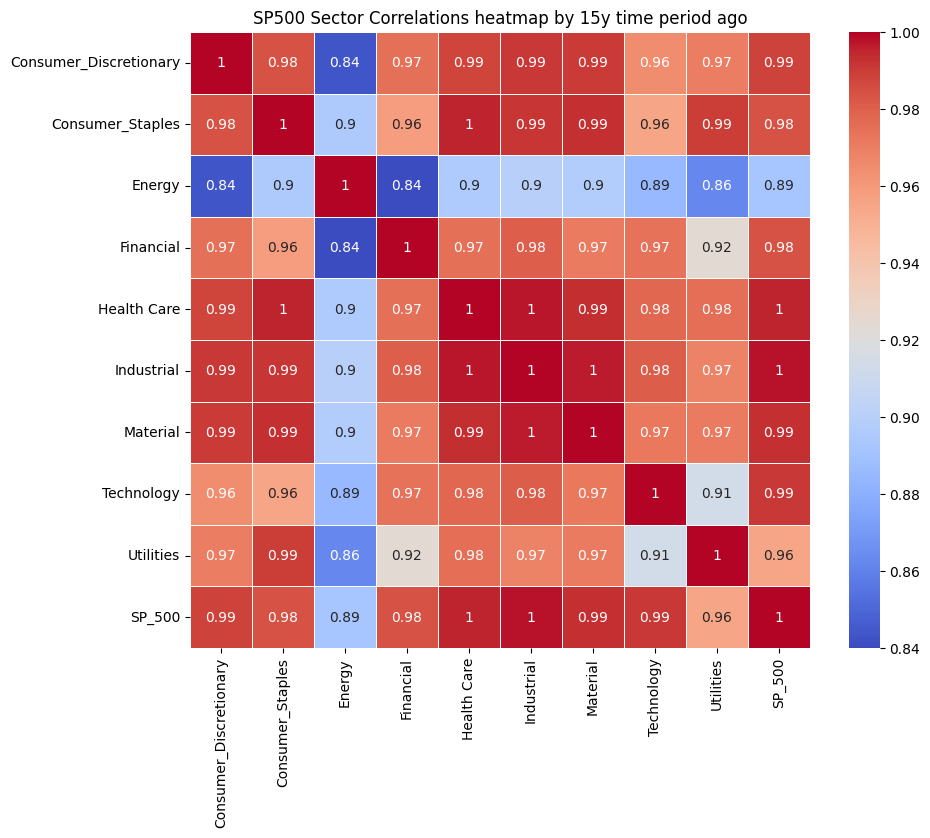

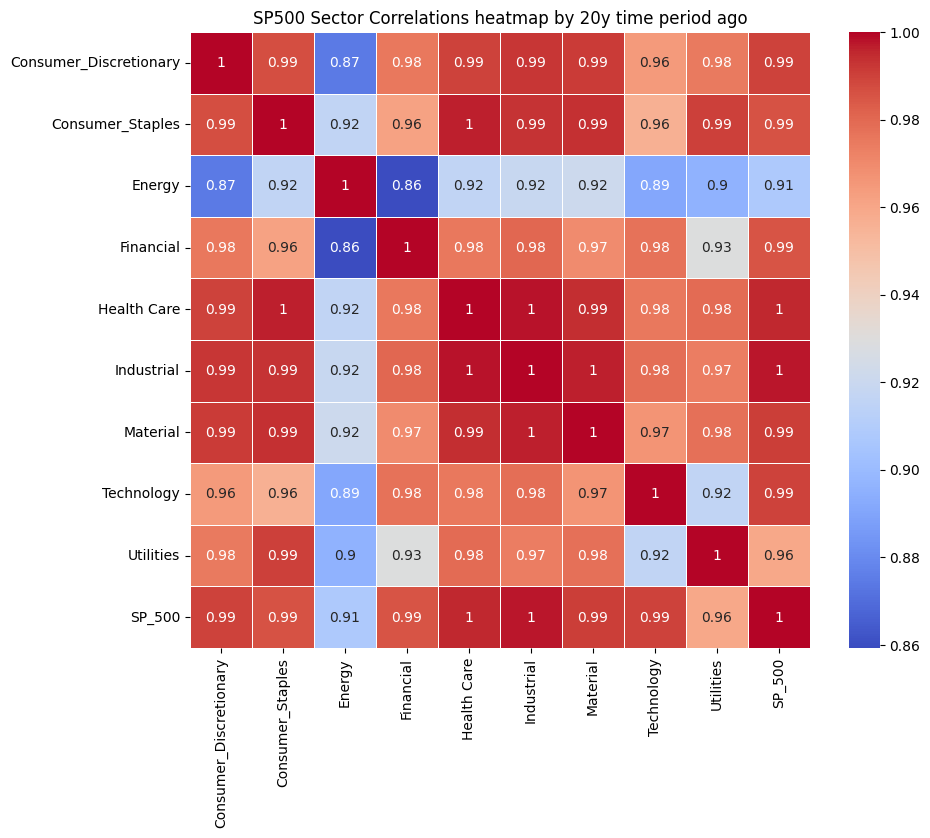

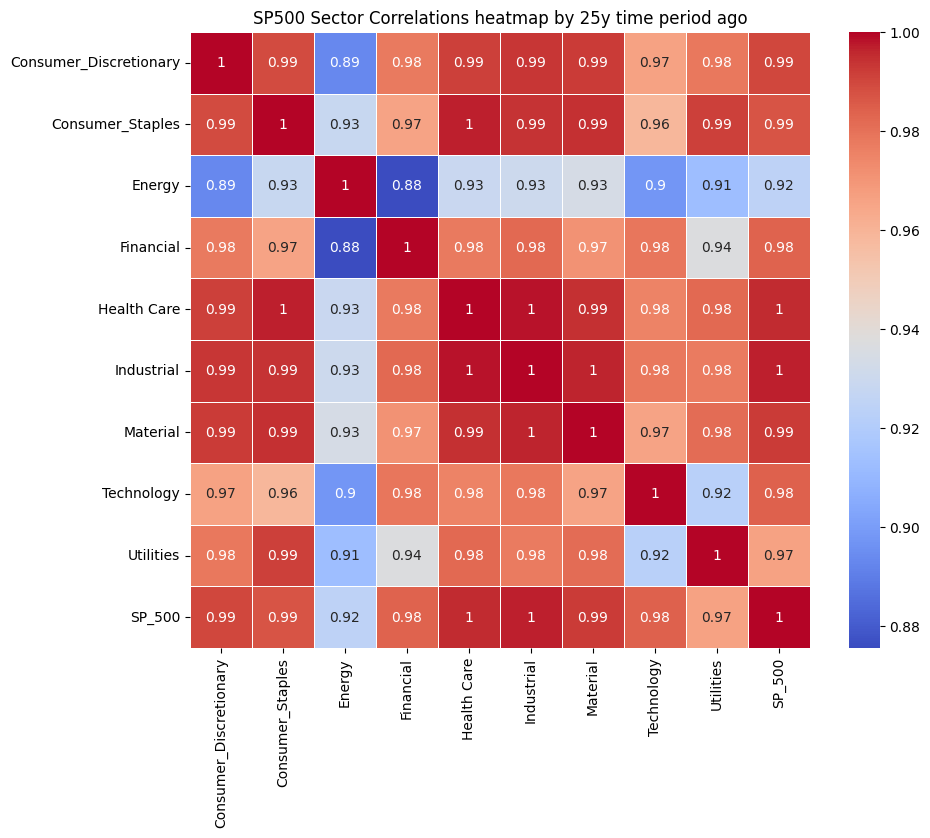

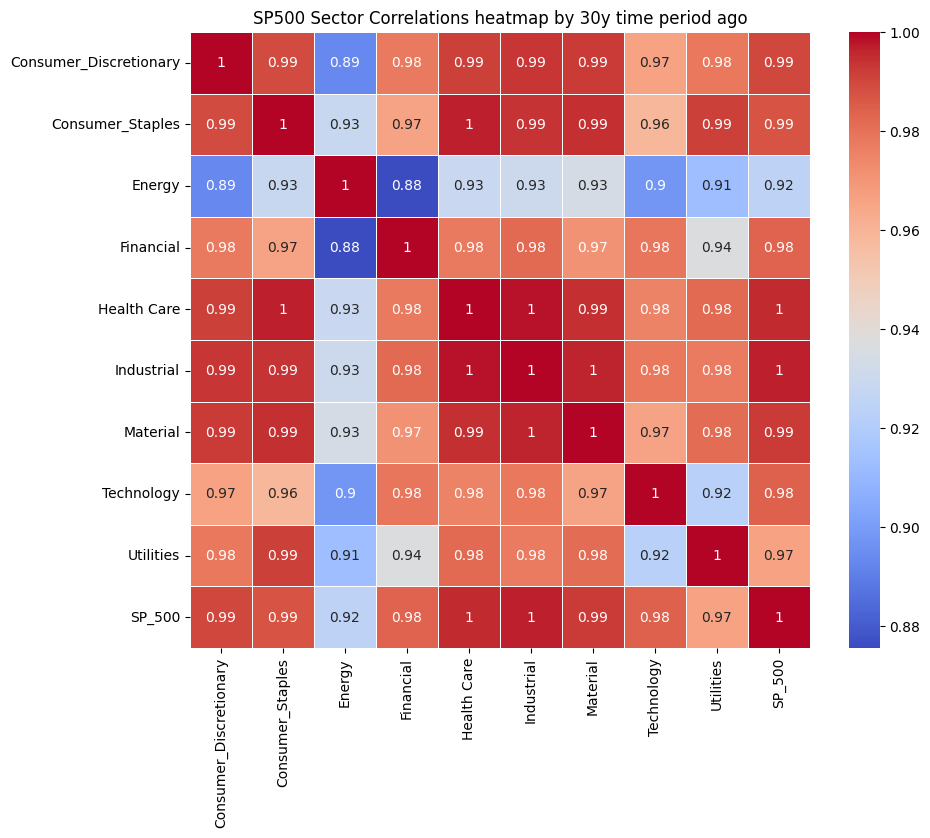

In [261]:
df_closing_prices_sub = df_closing_prices.iloc[:,0:-1].transpose()

for index, value in enumerate(df_closing_prices_sub.index): # need +1 for to include the last row of year
    corr_matrix = df_closing_prices_sub.iloc[0:index+2,:].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    if value.endswith('d'):
        plt.title(f"SP500 Sector Correlations heatmap by {value} time period ago")
    elif value.endswith('y'):
        plt.title(f"SP500 Sector Correlations heatmap by {value} time period ago")
    else:
        plt.title(f"SP500 Sector Correlations heatmap by {value}")
    plt.show()